<a href="https://colab.research.google.com/github/Divyalakshmikrishnaveni66/DIVYALAKSHMI-KRISHNAVENI_FMML_LABS-AND-PROJECTS/blob/main/FMML_Module4_Lab3_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [20]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

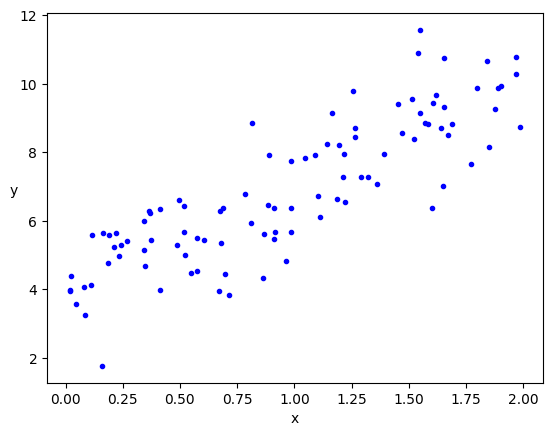

In [21]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [22]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [23]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [24]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.822
y_pred[1]: 3.148
Final error: 5954.494


Plotting the error vs Number of iterations

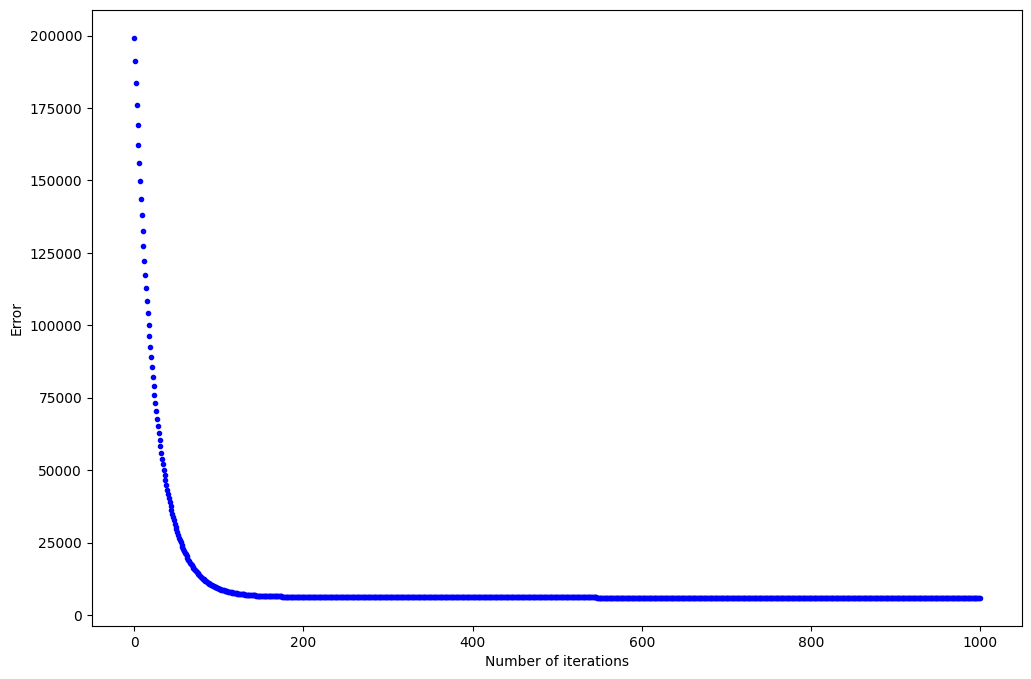

In [25]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

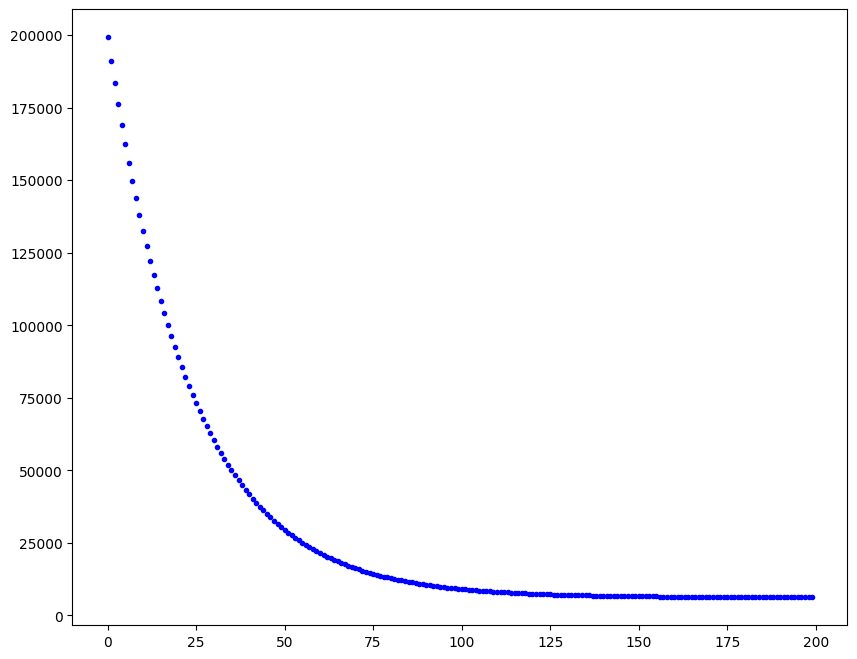

In [26]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [27]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [28]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.776
y_pred[1]: 3.068
Final error: 65.932


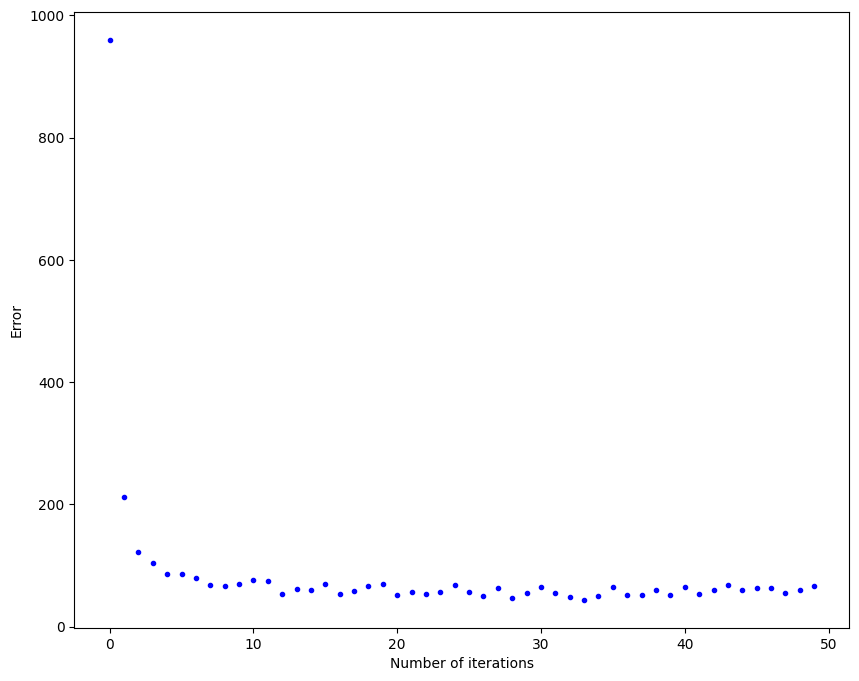

In [29]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [11]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [12]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.132
y_pred[1]: 2.843
Final error: 806.746


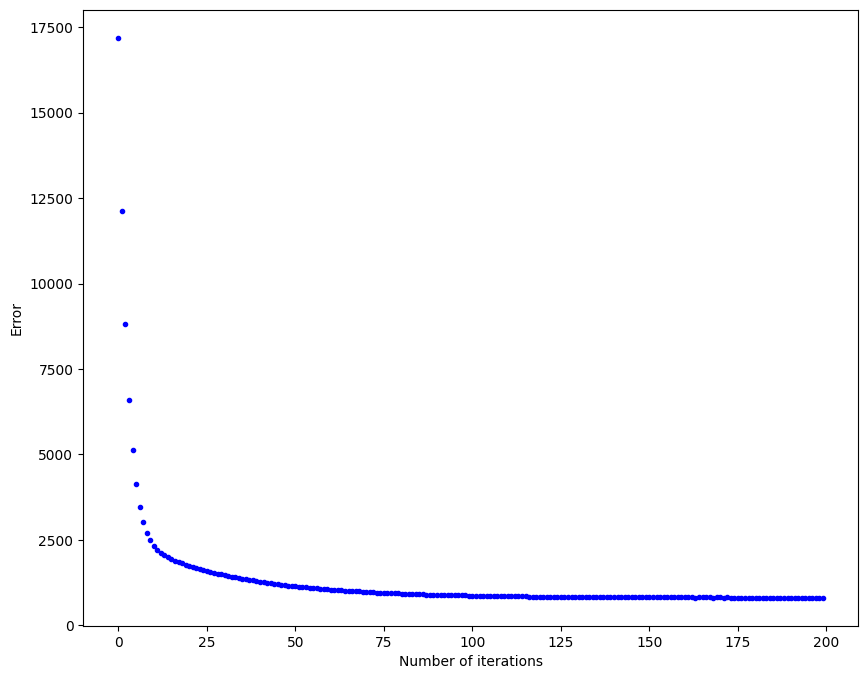

In [13]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

In mini-batch gradient descent, the batch size refers to the number of training examples utilized in one iteration. Adjusting the batch size can have an impact on the training process and the convergence of the model. Here are some considerations when changing the batch size:

Batch Size Selection:

Larger batch sizes lead to faster convergence as more training examples are processed in each iteration. Smaller batch sizes provide a regularizing effect and can lead to a better generalization. Computational Efficiency:

Larger batch sizes take advantage of parallel processing and can be more computationally efficient, especially on hardware with parallel capabilities (e.g., GPUs). Smaller batch sizes may lead to faster iterations but can be less computationally efficient. Memory Constraints:

Larger batch sizes require more memory, which might be a constraint on certain hardware. Smaller batch sizes consume less memory but might lead to less efficient GPU utilization. Stochastic Gradient Descent (SGD) vs. Mini-Batch:

A batch size of 1 corresponds to pure stochastic gradient descent (SGD). A batch size equal to the size of the entire dataset is known as batch gradient descent. Mini-batch sizes generally fall in between, providing a balance between the advantages of SGD and batch gradient descent. Impact on Convergence:

The choice of batch size can affect the convergence behavior. Smaller batch sizes introduce more noise but may escape local minima, leading to better generalization. To change the batch size, you typically need to modify the code where the training loop is implemented. Ensure that the data is divided into batches of the desired size, and the gradient descent update is performed on each batch.

Here's a simplified example in Python using a generic deep learning framework like TensorFlow or PyTorch:

ANS1:

In [15]:
import numpy as np

def cal_cost(theta, X, y):
    m = len(y)
    cost = (1/2*m) * np.sum(np.square(np.dot(X, theta) - y))
    return cost

def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

ANS2:

In [16]:



import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Define a simple neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train with full batch size
model.fit(X_train, y_train, epochs=50, batch_size=len(X_train), validation_data=(X_test, y_test))
print("Training accuracy with full batch size:", model.evaluate(X_train, y_train, verbose=0)[1])
print("Testing accuracy with full batch size:", model.evaluate(X_test, y_test, verbose=0)[1])

# Train with mini-batch size
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
print("Training accuracy with mini-batch size:", model.evaluate(X_train, y_train, verbose=0)[1])
print("Testing accuracy with mini-batch size:", model.evaluate(X_test, y_test, verbose=0)[1])

# Train with stochastic gradient descent (batch size 1)
model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_test, y_test))
print("Training accuracy with stochastic gradient descent:", model.evaluate(X_train, y_train, verbose=0)[1])
print("Testing accuracy with stochastic gradient descent:", model.evaluate(X_test, y_test, verbose=0)[1])

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 1.0255 - accuracy: 0.4500 - val_loss: 1.0088 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 41ms/step - loss: 1.0087 - accuracy: 0.5000 - val_loss: 0.9906 - val_accuracy: 0.5333
Epoch 3/50
1/1 [==============================] - 0s 37ms/step - loss: 0.9923 - accuracy: 0.5333 - val_loss: 0.9728 - val_accuracy: 0.6333
Epoch 4/50
1/1 [==============================] - 0s 37ms/step - loss: 0.9761 - accuracy: 0.5583 - val_loss: 0.9552 - val_accuracy: 0.6333
Epoch 5/50
1/1 [==============================] - 0s 45ms/step - loss: 0.9601 - accuracy: 0.5917 - val_loss: 0.9380 - val_accuracy: 0.6667
Epoch 6/50
1/1 [==============================] - 0s 56ms/step - loss: 0.9445 - accuracy: 0.6167 - val_loss: 0.9211 - val_accuracy: 0.6667
Epoch 7/50
1/1 [==============================] - 0s 53ms/step - loss: 0.9292 - accuracy: 0.6417 - val_loss: 0.9046 - val_accuracy: 0.7667
Epoch 8/50
1/1 [=============

ANS3:

Batch Gradient Descent (BGD): In BGD, the entire dataset is used to compute the gradient of the cost function, and the model parameters are updated once per iteration.

In [17]:
import numpy as np

# Assume cost_function and gradient_function are defined
# theta is the parameter vector

def batch_gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)

    for _ in range(num_iterations):
        gradient = gradient_function(X, y, theta)
        theta = theta - learning_rate * gradient / m

    return theta



Stochastic Gradient Descent (SGD): In SGD, only one training example is used to compute the gradient and update the model parameters in each iteration.

In [18]:
import numpy as np

# Assume cost_function and gradient_function are defined
# theta is the parameter vector

def stochastic_gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)

    for _ in range(num_iterations):
        for i in range(m):
            gradient = gradient_function(X[i], y[i], theta)
            theta = theta - learning_rate * gradient

    return theta

Mini-Batch Gradient Descent (MBGD): In MBGD, a batch of training examples (mini-batch) is used to compute the gradient and update the model parameters in each iteration.

In [19]:
import numpy as np

# Assume cost_function and gradient_function are defined
# theta is the parameter vector

def mini_batch_gradient_descent(X, y, theta, learning_rate, num_iterations, batch_size):
    m = len(y)

    for _ in range(num_iterations):
        for i in range(0, m, batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            gradient = gradient_function(X_batch, y_batch, theta)
            theta = theta - learning_rate * gradient / batch_size

    return theta